In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('../data/phrasebank.csv', encoding='ISO-8859-1')  # Adjust path/filename as needed
# Rename columns if needed
df.columns = ['Sentiment', 'Text']
# Clean and standardize sentiment labels
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()

# Optional: check the distribution
print(df['Sentiment'].value_counts())

Sentiment
Neutral     2878
Positive    1363
Negative     604
Name: count, dtype: int64


In [3]:
# Map labels: Negative → 0, Positive → 1, Neutral → 2
label_map = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
df['Label'] = df['Sentiment'].map(label_map)

# Drop rows with unexpected labels (NaN after mapping)
df = df[df['Label'].notna()]

import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label']
)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)



In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)


              precision    recall  f1-score   support

    Negative       0.60      0.73      0.66       121
    Positive       0.68      0.66      0.67       273
     Neutral       0.83      0.81      0.82       575

    accuracy                           0.76       969
   macro avg       0.71      0.73      0.72       969
weighted avg       0.76      0.76      0.76       969



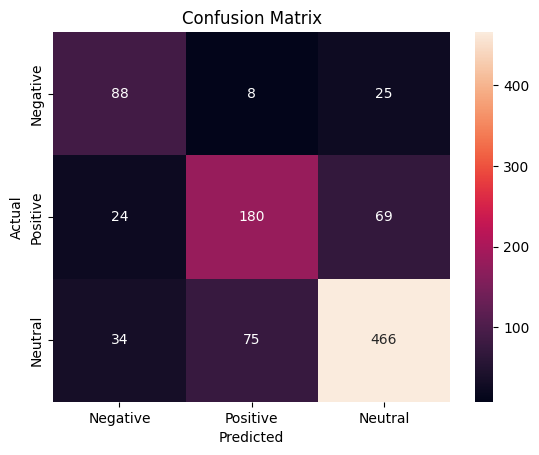

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
# Load the pre-fitted vectorizer from a pickle file
# save your trained tfidf and model:
import pickle

# Save vectorizer and model
with open('../models/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('../models/logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
